In [1]:
import os, sys
sys.path.append("C:/Users/isang/OneDrive/Desktop/DL/deep-learning-from-scratch-master")

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet

# Optimizer classes  
# Mini-batch Stochastic Gradient Descent class
class mini_SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

# RMSprop class
class RMSprop:
    def __init__(self, lr=0.01, decay_rate=0.99, epsilon=1e-8):
        self.lr = lr
        self.decay_rate = decay_rate
        self.epsilon = epsilon
        self.h = {}  # Squared gradient moving average

    def update(self, params, grads):
        if not self.h:
            for key in params:
                self.h[key] = np.zeros_like(grads[key])  # Initialize h for each param

        for key in params:
            # 1. Update moving average of squared gradients
            self.h[key] = self.decay_rate * self.h[key] + (1 - self.decay_rate) * (grads[key] ** 2)

            # 2. Apply adaptive learning rate scaling
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + self.epsilon)


In [2]:
# Load & Read MNIST Dataset
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128

# Experiment setup
optimizers = {
    'mini_SGD': mini_SGD(lr=0.01),
    'RMSprop': RMSprop(lr=0.01)
}

networks = {}
train_loss = {}

# Initialize networks & loss tracking  
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784,
        hidden_size_list=[100, 100, 100, 100],
        output_size=10
    )
    train_loss[key] = []

In [3]:
# Training 
# Training loop

for epoch in range(2000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        # Compute gradients and update parameters
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        # Compute and record loss
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    # Print loss every 100 iterations
    if epoch % 100 == 0:
        print("========== epoch: " + str(epoch) + " ==========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

========== epoch: 0 ==========
mini_SGD:2.332518099693904
RMSprop:14.103333682088529
========== epoch: 100 ==========
mini_SGD:1.4819117170212908
RMSprop:0.35215638925055376
========== epoch: 200 ==========
mini_SGD:0.8457056487959888
RMSprop:0.2849038528208391
========== epoch: 300 ==========
mini_SGD:0.5472828001258622
RMSprop:0.14686246199895692
========== epoch: 400 ==========
mini_SGD:0.44652453782848434
RMSprop:0.19425152494021541
========== epoch: 500 ==========
mini_SGD:0.44051698910220527
RMSprop:0.2893813609714834
========== epoch: 600 ==========
mini_SGD:0.45843686876138906
RMSprop:0.2529967362061332
========== epoch: 700 ==========
mini_SGD:0.36714068281719286
RMSprop:0.1437336777190843
========== epoch: 800 ==========
mini_SGD:0.21551550385689783
RMSprop:0.06636275908867413
========== epoch: 900 ==========
mini_SGD:0.2598286101433086
RMSprop:0.052508755109691385
========== epoch: 1000 ==========
mini_SGD:0.2682744006994741
RMSprop:0.07429133090810938
========== epoch: 1100

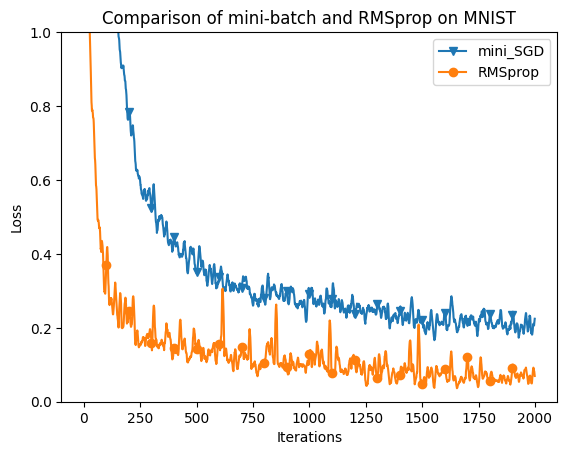

In [4]:
markers = {"mini_SGD" :"v", "RMSprop" : "o"}
x = np.arange(2000)

for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.ylim(0, 1)
plt.legend()
plt.title("Comparison of mini-batch and RMSprop on MNIST")
plt.show()